In [77]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt; plt.style.use('fivethirtyeight')

from distfit import distfit
from sklearn.preprocessing import OrdinalEncoder

# Load Data

In [80]:
df = pd.read_csv('../data/podcast_time.csv')
df.dropna(inplace=True)
 
X = df.drop('Listening_Time_minutes', axis=1)
y = df['Listening_Time_minutes']

cat_cols = X.select_dtypes(include=['object', 'category']).columns

encoder = OrdinalEncoder()
X[cat_cols] = encoder.fit_transform(X[cat_cols])

X = np.array(X)
y = np.array(y)

# Visualize Target Distribution

In [ ]:
dist = distfit()
dist.fit(y)

10-04-25 08:04:55 [distfit.distfit] > INFO     > fit
10-04-25 08:04:55 [distfit.distfit] > INFO     > transform
10-04-25 08:04:55 [distfit.distfit] > INFO     > [norm      ] [0.01 sec] [RSS: 0.00072747] [loc=45.437 scale=27.138]
10-04-25 08:04:55 [distfit.distfit] > INFO     > [expon     ] [0.00 sec] [RSS: 0.00261235] [loc=0.000 scale=45.437]
10-04-25 08:04:56 [distfit.distfit] > INFO     > [pareto    ] [0.85 sec] [RSS: 0.00261235] [loc=-6442450944.000 scale=6442450944.000]
10-04-25 08:05:09 [distfit.distfit] > INFO     > [dweibull  ] [13.0 sec] [RSS: 0.000890288] [loc=45.131 scale=24.711]
10-04-25 08:06:06 [distfit.distfit] > INFO     > [t         ] [56.5 sec] [RSS: 0.000727477] [loc=45.437 scale=27.138]
10-04-25 08:06:33 [distfit.distfit] > INFO     > [genextreme] [27.2 sec] [RSS: 0.000613986] [loc=34.243 scale=24.398]
10-04-25 08:06:50 [distfit.distfit] > INFO     > [gamma     ] [17.4 sec] [RSS: 0.000588639] [loc=-15.617 scale=13.270]
10-04-25 08:07:12 [distfit.distfit] > INFO     >

10-04-25 08:51:07 [distfit.distfit] > INFO     > Create pdf plot for the parametric method.
10-04-25 08:51:07 [distfit.distfit] > INFO     > Estimated distribution: Beta(loc:-0.659149, scale:122.522301)


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': 'Best Fit Distribution with Confidence Intervals\nbeta(a=1.35936, b=2.27079, loc=-0.659149, scale=122.522)'}, xlabel='Values', ylabel='Frequency'>)

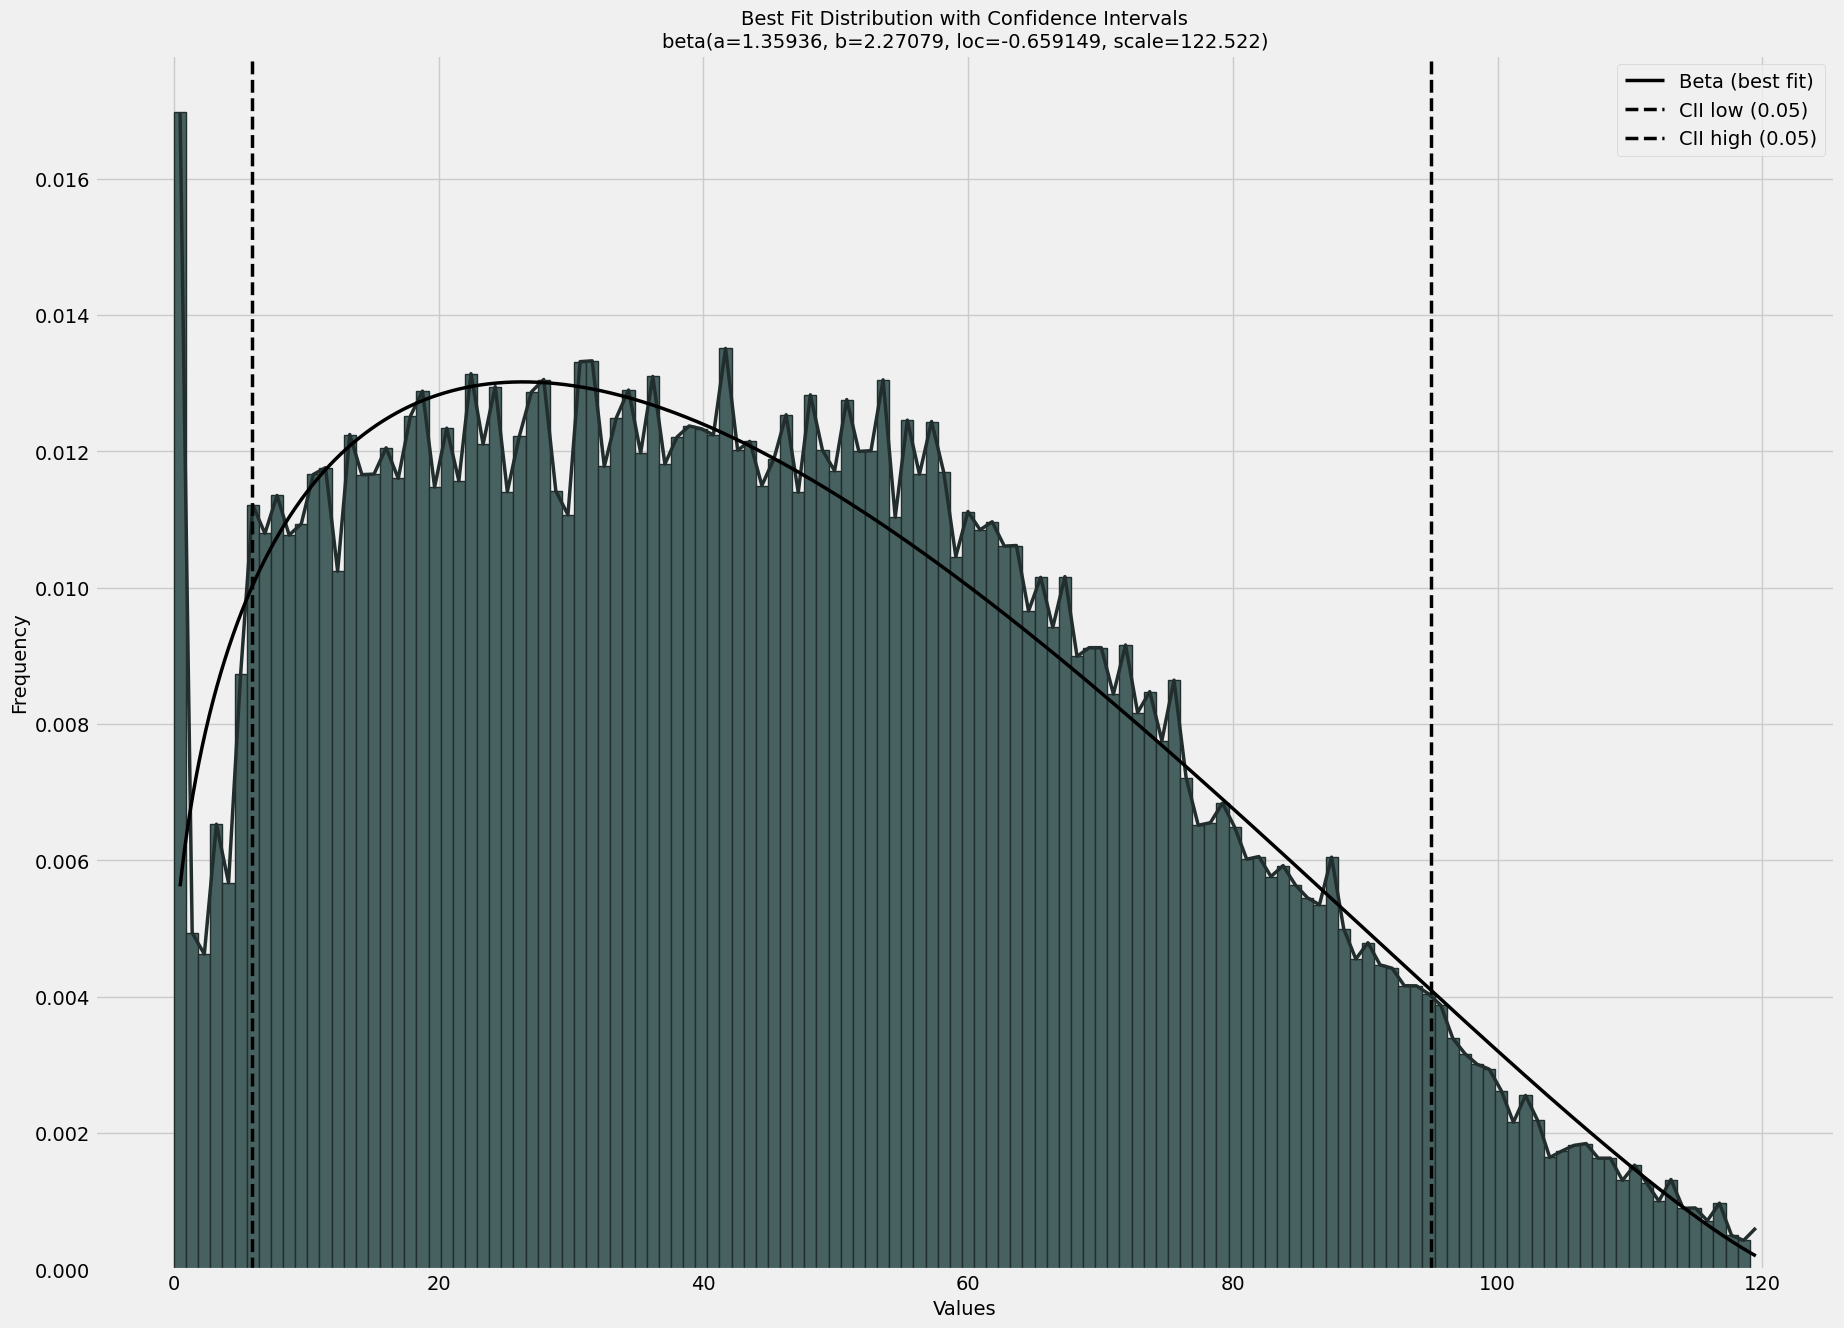

In [ ]:
dist.plot(
    chart='pdf',
    n_top=1,
    title='Best Fit Distribution with Confidence Intervals',

    emp_properties={ 
        'color': '#222e2d',
        'linewidth': 2.5, 
        'linestyle': '-' 
    },

    pdf_properties={ 
        'color': '#000',
        'linewidth': 2.5, 
        'linestyle': '-' 
    },  

    bar_properties={ 
        'color': '#466160',
        'linewidth': 1, 
        'edgecolor': '#222e2d',
        'align': 'center' 
    },

    cii_properties={ 
        'color': '#000',
        'linewidth': 2.5, 
        'linestyle': 'dashed', 
        'marker': 'o',
        'size': 20,
        'color_sign_multipletest': '#73112f',
        'color_sign': '#73112f',
        'color_general': '#73112f'
    },

    fontsize=14,
    xlabel='Values',
    ylabel='Frequency'
)